In [ ]:
import json
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -qq /content/drive/MyDrive/bar-plot.zip -d /content/ 

replace /content/dataset/aws-rekognition-output.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

!git clone https://github.com/atpro0424/yolov5_bar_detection.git
!git clone https://github.com/atpro0424/yolov5-bbox.git

YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.9/166.8 GB disk)
fatal: destination path 'yolov5_bar_detection' already exists and is not an empty directory.
fatal: destination path 'yolov5-bbox' already exists and is not an empty directory.


In [ ]:
INPUT_DIR = '/content/dataset/'
image_paths = sorted(os.listdir(os.path.join(INPUT_DIR, 'images/')))
annotation_paths = sorted(os.listdir(os.path.join(INPUT_DIR, 'annotations/')))
print('# of train images:', len(image_paths))
print('# of train annotations:', len(annotation_paths))

# of train images: 3168
# of train annotations: 3168


## Load AWS text detection results

In [ ]:
text_polygon_path = '/content/dataset/aws-rekognition-output.json'
with open(text_polygon_path, 'r') as f:
  text_polygon = json.load(f)
len(text_polygon)

3168

In [ ]:
!rm -r /content/yolov5/runs/detect

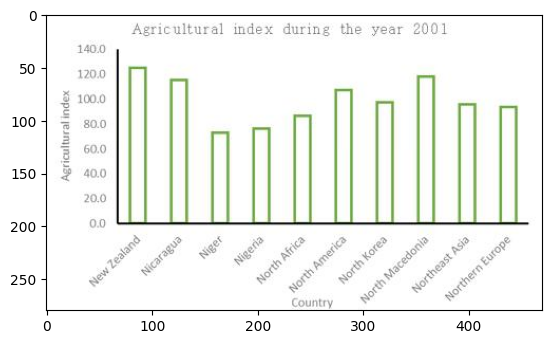

In [ ]:
index = 9
image = cv2.imread(os.path.join(INPUT_DIR, 'images/'+''.join(image_paths[index])))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
with open(os.path.join(INPUT_DIR, 'annotations/'+ ''.join(annotation_paths[index]))) as f:
  annotation = json.load(f)
plt.imshow(image)
plt.show()

In [ ]:
annotation

{'source': 'generated',
 'chart-type': 'vertical_bar',
 'plot-bb': {'height': 166, 'width': 390, 'x0': 68, 'y0': 33},
 'text': [{'id': 0,
   'polygon': {'x0': 80,
    'x1': 381,
    'x2': 381,
    'x3': 80,
    'y0': 6,
    'y1': 6,
    'y2': 22,
    'y3': 22},
   'text': 'Agricultural index during the year 2001',
   'role': 'chart_title'},
  {'id': 1,
   'polygon': {'x0': 231,
    'x1': 273,
    'x2': 273,
    'x3': 231,
    'y0': 267,
    'y1': 267,
    'y2': 278,
    'y3': 278},
   'text': 'Country',
   'role': 'axis_title'},
  {'id': 2,
   'polygon': {'x0': 12,
    'x1': 24,
    'x2': 24,
    'x3': 12,
    'y0': 71,
    'y1': 71,
    'y2': 159,
    'y3': 159},
   'text': 'Agricultural index',
   'role': 'axis_title'},
  {'id': 3,
   'polygon': {'x0': 37,
    'x1': 83,
    'x2': 91,
    'x3': 45,
    'y0': 252,
    'y1': 206,
    'y2': 214,
    'y3': 260},
   'text': 'New Zealand',
   'role': 'tick_label'},
  {'id': 4,
   'polygon': {'x0': 86,
    'x1': 124,
    'x2': 132,
    'x3':

In [ ]:
texts = text_polygon[image_paths[index]]['TextDetections']

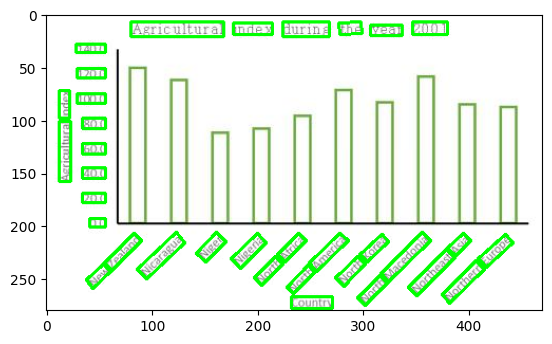

In [ ]:
detected_texts = []
for text in texts:
  if text['Type'] == 'WORD':
    polygon_points = text['Geometry']['Polygon']
    height, width, _ = image.shape
    scaled_points = np.array([[int(p['X'] * width), int(p['Y'] * height)] for p in polygon_points], dtype=np.int32)
    text['Points'] = scaled_points
    text['Center'] = np.mean(text['Points'], axis=0)
    detected_texts.append(text)
    line_color = (0, 255, 0) # Green color in BGR format
    line_thickness = 2
    cv2.polylines(image, [text['Points']], isClosed=True, color=line_color, thickness=line_thickness)
plt.imshow(image)
plt.show()


## Detect plot bounding boxes and bars bounding boxes

In [ ]:
image_path = ''.join(image_paths[index].split('.')[:-1])

In [ ]:
!python detect.py --hide-conf --hide-labels --save-txt --source /content/dataset/images/{image_path}.jpg --weights /content/yolov5/yolov5-bbox/best.pt

detect: weights=['/content/yolov5/yolov5-bbox/best.pt'], source=/content/dataset/images/00315ad26669.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/images/00315ad26669.jpg: 384x640 1 Chart, 51.6ms
Speed: 0.6ms pre-process, 51.6ms inference, 96.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


In [ ]:
!python detect.py --hide-conf --hide-labels --save-txt --source /content/dataset/images/{image_path}.jpg --weights /content/yolov5/yolov5_bar_detection/best.pt

In [ ]:
def load_yolo_result(path, image):
  with open(path, 'r') as f:
    lines = f.readlines()
  bounding_boxes = []
  for line in lines:
    parts = line.strip().split(' ')
    scaled_bbox = [float(parts[i]) for i in range(1, 5)]

    # Convert from scaled position to original position
    x_center = scaled_bbox[0] * image.shape[1]
    y_center = scaled_bbox[1] * image.shape[0]
    width = scaled_bbox[2] * image.shape[1]
    height = scaled_bbox[3] * image.shape[0]

    # Calculate top-left and bottom-right coordinates
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    bbox = [x1, y1, x2, y2]
    bounding_boxes.append(bbox)
  return bounding_boxes

In [ ]:
plot_bb_path = '/content/yolov5/runs/detect/exp/labels/{}.txt'.format(image_path)
bars_bb_path = '/content/yolov5/runs/detect/exp2/labels/{}.txt'.format(image_path)


In [ ]:
image = cv2.imread(os.path.join(INPUT_DIR, 'images/'+''.join(image_paths[index])))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bars_bb = load_yolo_result(path=bars_bb_path, image=image)
plot_bb = load_yolo_result(path=plot_bb_path, image=image)
line_color = (0, 255, 0) # Green color in BGR format
plot_bb_color = (0, 255, 255)
line_thickness = 2
for bar in bars_bb:
  cv2.rectangle(image, (bar[0], bar[1]), (bar[2], bar[3]), line_color, line_thickness)
cv2.rectangle(image, (plot_bb[0][0], plot_bb[0][1]), (plot_bb[0][2], plot_bb[0][3]), plot_bb_color, line_thickness)
plt.imshow(image)
plt.show()


## Text classification

In [ ]:
left_most_pos = image.shape[1]
left_most = None
y_axis_title = []
bottom_most_pos = 0
bottom_most = None
x_axis_title = []
for text in detected_texts:
  if text['Center'][0] < left_most_pos:
    left_most = text
    left_most_pos = text['Center'][0]
  if text['Center'][1] > bottom_most_pos:
    bottom_most = text
    bottom_most_pos = text["Center"][1]
for text in detected_texts:
  if abs(text['Center'][0] - left_most_pos) < 3:
    y_axis_title.append(text) 
  if abs(text['Center'][1] - bottom_most_pos) < 3:
    x_axis_title.append(text)
y_axis_title = sorted(y_axis_title, key=lambda x: x['Center'][1], reverse=True)
# x_axis_title = sorted(x_axis_title, key=lambda x: x['Center'][0])

In [ ]:
print('Y Axis Title:', [text['DetectedText'] for text in y_axis_title])
print('X Axis Title:', [text['DetectedText'] for text in x_axis_title])

In [ ]:
for text in y_axis_title:
  print(text['Center'])

In [ ]:
text['Center']

In [ ]:
# y_axis = plot_bb[0][0]
# x_axis = plot_bb[0][3]
y_axis_values = []
for text in detected_texts:
  if text['Center'][0] - y_axis_title[0]['Center'][0] > 3 and plot_bb[0][0] - text['Center'][0] > 3 and plot_bb[0][1] - 5 < text['Center'][1] < plot_bb[0][3] + 5:
    y_axis_values.append(text)
for value in y_axis_values:
  if ',' in value['DetectedText']:
    for i in range(len(y_axis_values)):
      print
      y_axis_values[i]['DetectedText'] = y_axis_values[i]['DetectedText'].replace('.', ',')
    break
y_axis_values = sorted(y_axis_values, key=lambda x: x['Center'][1], reverse=True)
print([text['DetectedText'] for text in y_axis_values])

In [ ]:
y_axis_values

In [ ]:
x_axis_values = []
for text in detected_texts:
  if  x_axis_title[0]['Center'][1] - text['Center'][1] > 3 and text['Center'][1] - plot_bb[0][3]> 3:
    x_axis_values.append(text)
x_axis_values = sorted(x_axis_values, key=lambda x: x['Center'][0])
print([text['DetectedText'] for text in x_axis_values])

In [ ]:
# Merge
def merge_text(text1, text2):
  new_text = {}
  new_text['DetectedText'] = text1['DetectedText']+' '+text2['DetectedText']
  new_text['Confidence'] = np.mean([text1['Confidence'], text2['Confidence']])
  new_text['Points'] = [text1['Points'][0], text2['Points'][1], text2['Points'][2], text1['Points'][3]]
  new_text['Center'] = np.mean(new_text['Points'], axis=0)
  return new_text

def distance(p1, p2):
  return np.sqrt(np.sum(np.square(np.subtract(p1, p2))))

slanted = False
if abs(x_axis_values[0]['Points'][0][1] - x_axis_values[0]['Points'][1][1] > 3):
# if slanted
  slanted = True
  for i in range(len(x_axis_values)):
    for j in range(len(x_axis_values)):
      if x_axis_values[i] != -1 and x_axis_values[j] != -1:
        if distance(x_axis_values[i]['Points'][1], x_axis_values[j]['Points'][0]) < 10:
          x_axis_values[i]=merge_text(x_axis_values[i], x_axis_values[j])
          x_axis_values[j]=-1

  # for i in range(1, len(x_axis_values)):
  #   if x_axis_values[i]['Points'][1][1] - x_axis_values[i-1]['Points'][1][1] < -3:
  #     x_axis_values[i]=merge_text(x_axis_values[i-1], x_axis_values[i])
  #     x_axis_values[i-1] = -1

while -1 in x_axis_values:
    x_axis_values.remove(-1)
print([text['DetectedText'] for text in x_axis_values])



In [ ]:

def distance(p1, p2):
  return np.sqrt(np.sum(np.square(np.subtract(p1, p2))))

distance([0, 0], [1, 1])

In [ ]:
chart_title = []
for text in detected_texts:
  if  plot_bb[0][1] - text['Center'][1] > 3:
    chart_title.append(text)
# chart_title = sorted(chart_title, key=lambda x: x['Center'][0])
print([text['DetectedText'] for text in chart_title])

## Data inference

In [ ]:
bars_bb[0]

In [ ]:
y_axis_values[0]['Points']

In [ ]:
from scipy import stats as st
gaps = []
for i in range(1, len(y_axis_values)):
  gaps.append(abs((y_axis_values[i]['Points'][1][1] + y_axis_values[i]['Points'][1][1] - y_axis_values[i-1]['Points'][1][1] - y_axis_values[i-1]['Points'][1][1])) / 2)
gap = st.mode(gaps, keepdims=False)[0]
y_axis_tick_pos = [bars_bb[0][3] - i * gap for i in range(len(y_axis_values))]
# print(st.mode(gaps, keepdims=False)[0])

In [ ]:
y_axis_tick_pos

In [ ]:
bars_center = []
for bar in bars_bb:
  bars_center.append(((bar[0]+bar[2])/2, bar[1]))
bars_center = sorted(bars_center)

In [ ]:
data_points_y = {}
threshold = 10
if len(bars_center) > 2:
  gaps = []
  for i in range(1, len(bars_center)):
    gaps.append(abs(bars_center[i][0] - bars_center[i-1][0]))
  threshold = np.min(gaps) / 4
for x in x_axis_values:
  data_points_y[x['DetectedText']] = plot_bb[0][3]
  for x_ in bars_center:
    if slanted:
      if abs(x['Points'][1][0] - x_[0]) < threshold:
        data_points_y[x['DetectedText']]=x_[1]
    else:
      if abs(np.mean(x['Points'][0][0], x['Points'][1][0]) - x_[0]) < threshold:
        data_points_y[x['DetectedText']]=x_[1]
data_points_y

In [ ]:
def estimate_y_value(y_axis_tick_pos, y_axis_values, y0):
  result = []
  for i in range(len(y_axis_values)):
    if bars_bb[0][3] - y_axis_tick_pos[i] != 0:
      str_num = y_axis_values[i]['DetectedText']
      if ',' in str_num:
        str_num = str_num.replace(',', '')
      result.append(((y_axis_tick_pos[i] - y0)/(bars_bb[0][3] - y_axis_tick_pos[i]) + 1) * float(str_num))
      
  z_scores = np.abs((result - np.mean(result)) / np.std(result))
  # Define a threshold for the z-score
  threshold = 3

  # Remove the numbers with a z-score greater than the threshold
  outlier_indices = np.where(z_scores > threshold)
  filtered_numbers = np.delete(result, outlier_indices)
  return np.mean(result)

In [ ]:
data_series = {}
for data_point in data_points_y:
  data_series[data_point]=estimate_y_value(y_axis_tick_pos, y_axis_values, data_points_y[data_point])

In [ ]:
data_series

In [ ]:
annotation['data-series']

In [ ]:
detected_keys = list(data_series.keys())
annotation_keys = [d['x'] for d in annotation['data-series']]
num_fail = len(set(detected_keys).union(set(annotation_keys)))
num_all = len(detected_keys)

In [ ]:
detected_keys

In [ ]:
detected_values = list(data_series.values())
annotation_values = [float(d['y']) for d in annotation['data-series']]
error_rates = (abs(np.subtract(detected_values, annotation_values))) / annotation_values
error_rates.mean()

In [ ]:
print(detected_values)
print(annotation_values)

In [ ]:
error_rates